<!-- Projeto desenvolvido por Fran Mateus - www.franmateus.com -->
# <font color='darkblue'>MODELOS DE CREDIT SCORING - v3</font>

### **<font color='red'>1- ENTENDIMENTO DO NEGÓCIO</font>**

### **<font color='orange'>Objetivo do projeto:</font>**

Avaliar qual modelo de machine learning, dentre os seis abaixo, apresenta a melhor acurária na **classificação de risco** para concessão de novos créditos a partir de uma determinada base de clientes, usando as métricas de Acurácia, F1 Score e o Teste KS como referência. Além disso, foi feita uma otimização usando o Randomized Search. 

### **<font color='orange'>Algoritmos usados:</font>**

Nesta etapa, estamos modelando os dados com redes neurais artificiais através do framework **Keras TensorFlow**.

### **<font color='orange'>Base de dados:</font>**

O dataset utilizado chama-se **Default od Credit Cards** e foi disponibilizado pela UCI. Ele possui 1 coluna de identificação, 23 variáveis explicativas, 1 variável dependente binária e 30.000 observações (sem valores ausentes).

*Link para o dataset:* https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### **<font color='red'>2- COLETA E EXPLORAÇÃO DOS DADOS</font>**

### **<font color='orange'>Bibliotecas/Frameworks:</font>**

In [1]:
# pip install ucimlrepo

In [2]:
# Coleta dos dados
from ucimlrepo import fetch_ucirepo

from IPython.display import display

# Análise exploratória e tratamento dos dados
import pandas as pd
import numpy as np
import math

# Visualização dos dados
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# Modelagem dos dados
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Avaliação dos modelos
from sklearn.metrics import accuracy_score, auc, precision_recall_curve, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, average_precision_score, log_loss, brier_score_loss

import warnings
warnings.filterwarnings("ignore")

C:\Users\mfran\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\mfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### **<font color='orange'>Leitura e exploração dos dados:</font>**

In [3]:
# Coletando os dados 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# Transformando num dataframe 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets

In [4]:
X.shape

(30000, 23)

In [5]:
y.shape

(30000, 1)

In [6]:
y.value_counts()

Y
0    23364
1     6636
dtype: int64

### **<font color='darkblue'>3- PREPARAÇÃO DOS DADOS</font>**

### **<font color='red'>Separando as bases em treino e teste:</font>**

In [7]:
# Bases para treino (90%) e teste (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 20)

In [8]:
display(X_train.head(2))
display(y_train.head(2))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
25039,150000,1,1,1,55,0,0,0,0,0,...,149386,149031,78284,76500,5200,7200,4800,2730,2750,2800
10376,460000,2,2,2,33,-1,-1,-1,-1,-2,...,3352,0,0,44849,0,3352,0,0,44849,0


,Y
25039,0
10376,0


In [9]:
print("Bases de treino = ", X_train.shape, y_train.shape)

Bases de treino =  (27000, 23) (27000, 1)


In [10]:
print("Bases de teste = ", X_test.shape, y_test.shape)

Bases de teste =  (3000, 23) (3000, 1)


### **<font color='darkblue'>4- MODELOS DE CLASSIFICAÇÃO COM KERAS - TENSORFLOW</font>**

O modelo sequencial é a forma mais simples e eficiente para construção de modelos do tipo *feed-forward* e demanda 5 etapas para sua construção.

1. Definição das camadas do modelo;
2. Compilação do modelo;
3. Treinamento;
4. Avaliação; e
5. Predições.

### **<font color='orangered'>Modelo 1: Sequencial Simples</font>**

* Modelo como uma entrada e saída única da rede de neurônios

In [28]:
# 1- Definindo as camadas do modelo

model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=[23]),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                1536      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 2 - Compilando o modelo com a função de custo de entropia cruzada (cross entropy) e a métrica de acurácia
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'])

In [30]:
# Treinando o modelo
history = model.fit(
    X_train, y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=100,
    verbose=0,
)

In [31]:
# Dataframe para reproduzir a curva de aprendizado do modelo

def display_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
    
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

  print(("Melhor % Perda/Loss em Validação: {:0.4f}" +\
      "\nMelhor Acurácia em Validação: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))
  return

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.546792,0.754897,0.543805,0.764444
1,0.521686,0.780494,0.541690,0.764444
2,0.521296,0.780494,0.542095,0.764074
3,0.520675,0.780494,0.539083,0.764444
4,0.518298,0.780494,0.537060,0.764444


Melhor % Perda/Loss em Validação: 0.5355
Melhor Acurácia em Validação: 0.7644


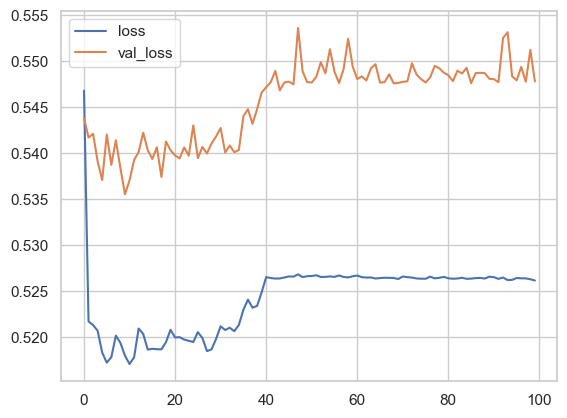

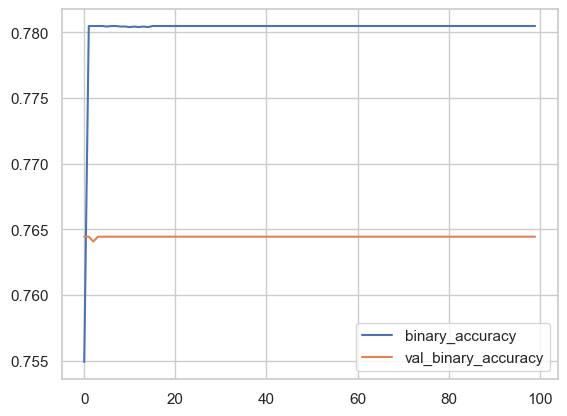

In [32]:
display_hist(history)

In [33]:
# 4 - Função para obter a avaliação dos resultados

def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print('Acurácia: ' , accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  return

In [34]:
# 5 - Fazendo predições e obtendo a avaliação da métrica de acurária
y_pred = model.predict(X_test) > 0.50

print_results(y_test, y_pred)

94/94 [==============================] - 0s 680us/step
Matriz de Confusão: 
 [[2334    0]
 [ 666    0]]
Acurácia:  0.778
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2334
           1       0.00      0.00      0.00       666

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.68      3000



### **<font color='orangered'>Modelo 2: Sequencial com otimização - Parte 1</font>**

* Modelo como mais de uma camada de entrada e saída única da rede de neurônios.

In [35]:
# 1 - Definindo as camadas do modelo

model = keras.Sequential(layers.Dense(64, activation='relu', input_shape=[23]))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                1536      
                                                                 
 dense_14 (Dense)            (None, 30)                1950      
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,807
Trainable params: 3,807
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 2 - Compilando o modelo

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [37]:
# Usando outros parametros de otimização do Keras

early_stopping = keras.callbacks.EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=False)

In [38]:
# 3 - Treinando o modelo

history = model.fit(
    X_train, y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,351.821472,0.695062,120.366737,0.708148
1,118.005287,0.702963,95.058029,0.677407
2,78.824142,0.706708,61.268280,0.700000
3,68.797150,0.700947,76.558159,0.738148
4,53.587654,0.705597,45.768787,0.750000


Melhor % Perda/Loss em Validação: 0.5227
Melhor Acurácia em Validação: 0.7644


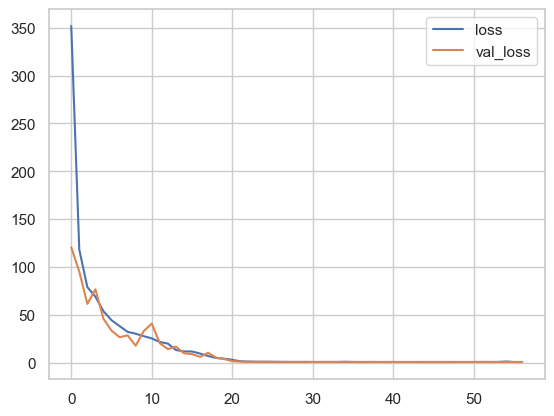

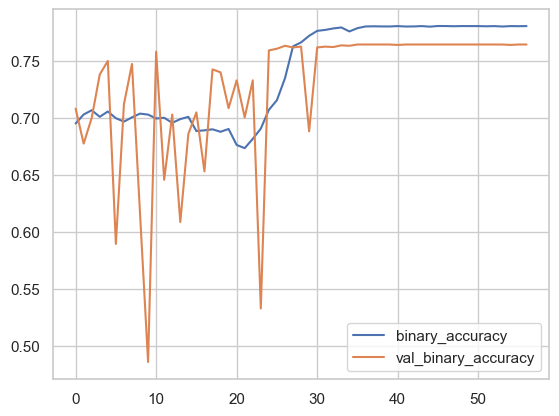

In [39]:
display_hist(history)

In [40]:
# 5 - Fazendo predições e obtendo a avaliação da métrica de acurária
y_pred = model.predict(tf.constant(X_test)) > 0.50

print_results(y_test, y_pred)

94/94 [==============================] - 0s 794us/step
Matriz de Confusão: 
 [[2332    2]
 [ 666    0]]
Acurácia:  0.7773333333333333
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2334
           1       0.00      0.00      0.00       666

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.68      3000



### **<font color='orangered'>Modelo 2: Sequencial com otimização - Parte 2</font>**

In [41]:
# 1 - Definindo as camadas do modelo
model = keras.Sequential(layers.Dense(64, activation='relu', input_shape=[23]))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

# 2 - Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Usando outros parametros de otimização do Keras
early_stopping = keras.callbacks.EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=False)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                1536      
                                                                 
 dense_18 (Dense)            (None, 30)                1950      
                                                                 
 dense_19 (Dense)            (None, 22)                682       
                                                                 
 dense_20 (Dense)            (None, 10)                230       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,409
Trainable params: 4,409
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 3 - Treinando o modelo
history = model.fit(
    X_train, y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,89.107811,0.684115,19.878424,0.717037
1,24.649857,0.691934,24.786745,0.624444
2,20.988865,0.694156,19.202812,0.755926
3,13.104795,0.696872,12.788238,0.575185
4,11.256073,0.692181,5.955956,0.608519


Melhor % Perda/Loss em Validação: 0.5463
Melhor Acurácia em Validação: 0.7663


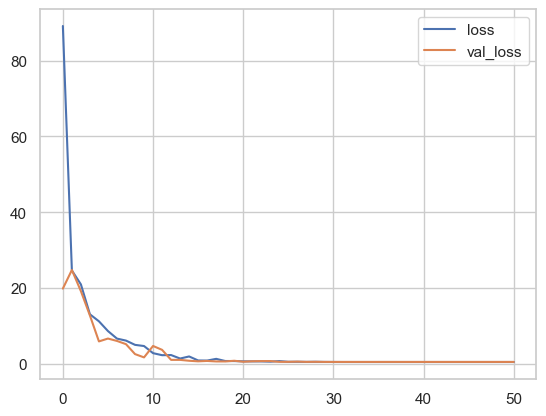

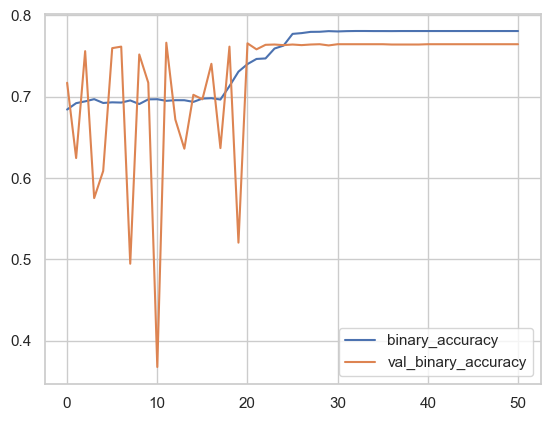

In [43]:
display_hist(history)

In [44]:
# 4 e 5 - Fazendo predições e obtendo a avaliação da métrica de acurária
y_pred = model.predict(tf.constant(X_test)) > 0.50

print_results(y_test, y_pred)

94/94 [==============================] - 0s 893us/step
Matriz de Confusão: 
 [[2333    1]
 [ 665    1]]
Acurácia:  0.778
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2334
           1       0.50      0.00      0.00       666

    accuracy                           0.78      3000
   macro avg       0.64      0.50      0.44      3000
weighted avg       0.72      0.78      0.68      3000



### **<font color='darkblue'>4 - RANKING DOS MODELOS PARA CLASSIFICAÇÃO USANDO REDES NEURAIS</font>**

Métrica: **Acurácia**
- 1º) Modelo com 1 camada de entrada   = 0.778 (1601 parametros) </font>
- 2º) Modelo com 3 camadas de entrada  = 0.7773 (3807 parametros)</font>
- 3º) Modelo com 4 camadas de entrada  = 0.778 (4409 parametros)</font>

**Conclusão:** Considerando somente esses 3 modelos treinados para a base de dados apresentada, um modelo de rede neural sequencial simples poderia resolver o problema em termos de acurácia, com a vantagem de usar menos recursos computacionais. Os modelos mais complexos (muitas camadas e parametros) tiveram resultados parecidos, porém fizeram uso de muito recurso computacional e, consequentemente, de tempo de execução.

**Observação:** Nenhum dos 3 modelos de redes neurais conseguiu identificar os clientes inadimplentes (classe 1) e todos apresentaram acurária inferior a 80%. Ou seja, todos exigiriam outras alterações nos hiperparâmetros e nas camadas de treinamento dos modelos para se tornarem mais eficazes.